# Finding the best markets to advertise in

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in **advertisement**. Our goal in this project is to find out the two best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

Let's start by importing the necessary libraries ,reading the csv file and exploring the first few rows of our data.

In [11]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
survey_df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
survey_df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
survey_df.columns.values

array(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber',
       'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls',
       'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev',
       'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool',
       'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge',
       'CodeEventRailsGirls', 'CodeEventStartUpWknd',
       'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen',
       'CountryLive', 'EmploymentField', 'EmploymentFieldOther',
       'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning',
       'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther',
       'HasChildren', 'HasDebt', 'HasFinancialDependents',
       'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary',
       'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x',
       'ID.y',

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working.

In [17]:
survey_df['JobRoleInterest'].value_counts()

Full-Stack Web Developer                                                                                                                      823
  Front-End Web Developer                                                                                                                     450
  Data Scientist                                                                                                                              152
Back-End Web Developer                                                                                                                        142
  Mobile Developer                                                                                                                            117
                                                                                                                                             ... 
Game Developer, Back-End Web Developer, Full-Stack Web Developer,   Front-End Web Developer,   Mobile Developer             

In [18]:
pd.isna(survey_df['JobRoleInterest']).sum()

11183

As we can see from the above cells, we cannot directly use the `JobRoleInterest` column. We need to transform it.

To do so, we'll iterate thorugh each value of `JobRoleInterest` column and if it is not null, we'll split the string on comma and strip any unwanted spaces. We will then save it in a dictionary which is keeping track of the count of each role.

In [19]:
job_roles_frequency = {}
def get_job_roles_frequency(job_roles):
    if pd.notna(job_roles):
        job_role = job_roles.split(',')
        job_role = [x.strip() for x in job_role]
        for x in job_role:
            if x in job_roles_frequency:
                job_roles_frequency[x] += 1
            else:
                job_roles_frequency[x] = 1

In [20]:
survey_df['JobRoleInterest'].apply(get_job_roles_frequency)
job_roles_frequency

{'Full-Stack Web Developer': 4198,
 'Front-End Web Developer': 3533,
 'Back-End Web Developer': 2772,
 'DevOps / SysAdmin': 927,
 'Mobile Developer': 2304,
 'Information Security': 1326,
 'Quality Assurance Engineer': 498,
 'Game Developer': 1628,
 'User Experience Designer': 1469,
 'Data Scientist': 1643,
 'Data Engineer': 1248,
 'Product Manager': 814,
 'Ethical Hacker': 2,
 'security expert': 1,
 'Technical Writer': 1,
 'Researcher': 2,
 'Systems Engineer': 1,
 'Desktop Applications Programmer': 1,
 'Robotics': 1,
 'Non technical': 1,
 'UI Design': 1,
 'Software engineer': 4,
 'email coder': 1,
 'Data analyst': 1,
 'I dont yet know': 1,
 'UX developer/designer': 1,
 'support scientific resaerch': 1,
 'AI and neuroscience': 1,
 'Full Stack Software Engineer': 1,
 'Program Manager': 1,
 'Application Support Analyst': 1,
 "This futurist's dream of using some tech in a way that inspires critical amounts of people to influence the changes we need to protect": 1,
 'Information Architect':

<AxesSubplot:>

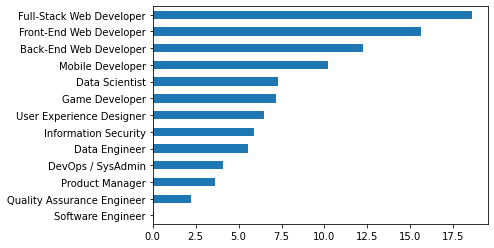

In [21]:
job_roles_frequency_series = pd.Series(job_roles_frequency)
job_roles_frequency_series_normalize = job_roles_frequency_series.sort_values(ascending = False)[:13][::-1] / job_roles_frequency_series.sum() * 100
job_roles_frequency_series_normalize.plot.barh()

In [25]:
job_roles_frequency_series_normalize[::-1][:4].sum()

56.66814159292035

<AxesSubplot:>

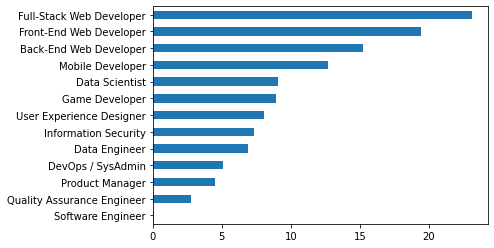

In [22]:
job_roles_frequency_series_normalize_per_person = job_roles_frequency_series.sort_values(ascending = False)[:13][::-1] / survey_df.shape[0] * 100
job_roles_frequency_series_normalize_per_person.plot.barh()

As we can see from the bar plot, most of the people are interested in roles of `Full-stack web developer, Front-end web developer, Back-end web developer,` and `Mobile developer`.


Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

The data set provides information about the location of each participant at a country level. The `CountryCitizen` variable describes the country of origin for each participant, and the `CountryLive` variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

To make sure you're working with a representative sample, we will drop all the rows where participants didn't answer what role they are interested in. Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participants.

In [26]:
survey_df = survey_df[pd.notna(survey_df['JobRoleInterest'])]

In [27]:
pd.isna(survey_df['JobRoleInterest']).sum()

0

<AxesSubplot:>

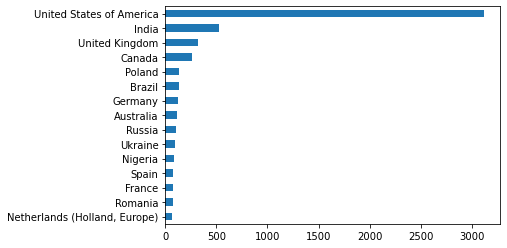

In [28]:
survey_df['CountryLive'].value_counts()[:15][::-1].plot.barh()

<AxesSubplot:>

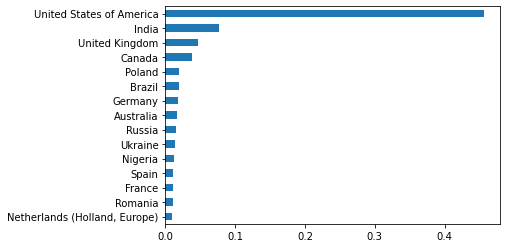

In [29]:
survey_df['CountryLive'].value_counts(normalize=True)[:15][::-1].plot.barh()

We found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.

- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

Next, we will create a new column that describes the amount of money a student has spent per month (at the moment they completed the survey).

We need to divide the `MoneyForLearning` column to the `MonthsProgramming` column.
Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, we replace all the values of 0 with 1.

In [30]:
survey_df[survey_df['MonthsProgramming'] == 0] = 1 
survey_df['MoneySpentPerMonth'] = survey_df['MoneyForLearning'] / survey_df['MonthsProgramming']
survey_df.dropna(subset=['MoneySpentPerMonth','CountryLive'], inplace=True)
grouped = survey_df.groupby('CountryLive')
grouped['MoneySpentPerMonth'].mean()[['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    232.771574
India                       136.347477
United Kingdom               46.904110
Canada                      107.415450
Name: MoneySpentPerMonth, dtype: float64

In [31]:
grouped['MoneySpentPerMonth'].median()[['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    4.166667
India                       0.000000
United Kingdom              0.150000
Canada                      0.000000
Name: MoneySpentPerMonth, dtype: float64

In [32]:
grouped['MoneySpentPerMonth'].max()[['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    80000.0
India                       10000.0
United Kingdom               1400.0
Canada                       5000.0
Name: MoneySpentPerMonth, dtype: float64

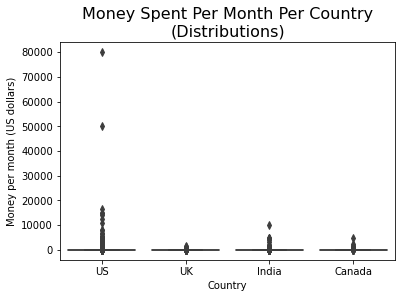

In [35]:
only_4 = survey_df[
                (survey_df['CountryLive'] == 'United States of America') | 
                (survey_df['CountryLive'] == 'India') |
                (survey_df['CountryLive'] == 'United Kingdom') |
                (survey_df['CountryLive'] == 'Canada')
            ]

sns.boxplot(x = 'CountryLive',
            y = 'MoneySpentPerMonth', 
            data = only_4
)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see a few extreme outliers for India (values over $2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [37]:
# Inspect the extreme outliers for India
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['MoneySpentPerMonth'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "*Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?*", so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.

In [38]:
only_4 = only_4.drop(india_outliers.index)

Looking back at the box plot above, we can also see more extreme outliers for the US (values over $6000 per month). Let's examine these participants in more detail.

In [39]:
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['MoneySpentPerMonth'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,80000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend $6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

- Didn't attend bootcamps.
- Had been programming for three months or less when at the time they completed the survey.

In [40]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['MoneySpentPerMonth'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['MoneySpentPerMonth'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly $5000 per month. Let's examine this person in more depth.

In [41]:
# Examine the extreme outliers for Canada
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['MoneySpentPerMonth'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneySpentPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [ ]:
# Remove the extreme outliers for Canada
only_4 = only_4.drop(canada_outliers.index)

In [44]:
# Recompute mean sum of money spent by students each month
only_4.groupby('CountryLive').mean()['MoneySpentPerMonth']

CountryLive
Canada                       86.506969
India                        65.628917
United Kingdom               46.904110
United States of America    146.862564
Name: MoneySpentPerMonth, dtype: float64

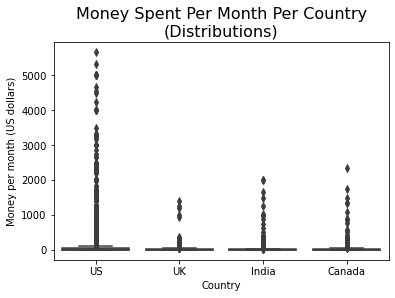

In [45]:
# Visualize the distributions again
sns.boxplot(y = 'MoneySpentPerMonth', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

## Choosing the Two Best Markets
Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly 146).

We sell subscriptions at a price of 59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly 86 per month, compared to India (66) and the United Kingdom (47).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

59 doesn't seem like an expensive sum for people in India since they spend on average 66 each month.
We have almost twice as more potential customers in India than we have in Canada:

In [46]:
# Frequency table for the 'CountryLive' column
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.613333
India                       11.946667
United Kingdom               7.200000
Canada                       6.240000
Name: CountryLive, dtype: float64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

- Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

60% for the US, 25% for India, 15% for Canada.
50% for the US, 30% for India, 20% for Canada; etc.

- Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

70% for the US, and 30% for India.
65% for the US, and 35% for Canada; etc.

- Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## Conclusion
In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.